**Instructors**: Prof. Keith Chugg (chugg@usc.edu) & Prof. Antonio Ortega (aortega@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Book**: Watt, J., Borhani, R., & Katsaggelos, A. K. (2020). Machine learning refined: Foundations, algorithms, and applications. Cambridge University Press.

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu) and Prof. Keith Chugg (chugg@usc.edu). These notebooks are based on the following **Github repository**: [notebooks](https://github.com/jermwatt/machine_learning_refined/tree/gh-pages/presentations/2nd_edition/jupyter%20%2B%20reveal.js%20version)

# Zero Order Optimization Techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from matplotlib import cm
import copy
# import automatic differentiator to compute gradient module
from autograd import grad
from PIL import Image
from scipy.signal import find_peaks

## Random Sampling

In [2]:
def objective(w):
	return w ** 2.0

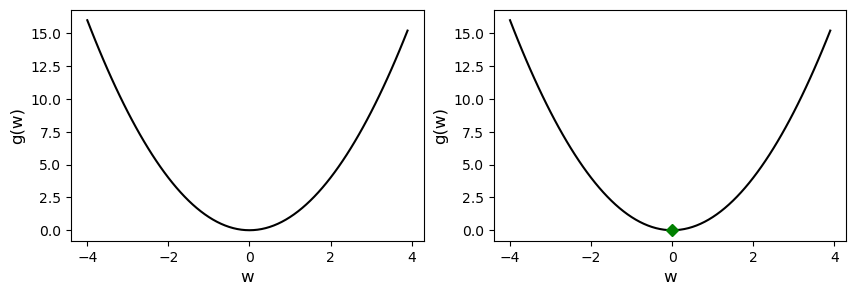

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
r_min, r_max = -4.0, 4.0
inputs = np.arange(r_min, r_max, 0.1)
results = objective(inputs)
ax1.plot(inputs, results, 'k')
ax1.set_xlabel('w', fontsize=12)
ax1.set_ylabel('g(w)', fontsize=12)
ax2.plot(inputs, results, 'k')
ax2.set_xlabel('w', fontsize=12)
ax2.set_ylabel('g(w)', fontsize=12)
ax2.plot(inputs[np.argmin(results)], min(results),'gD' )
plt.show()

In [4]:
def objective(w):
	return -1 * w ** 2.0

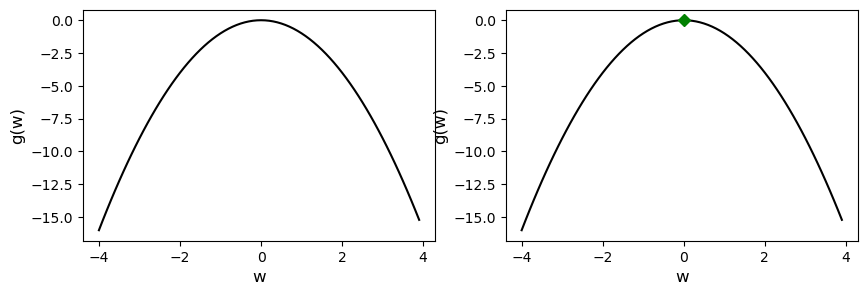

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
r_min, r_max = -4.0, 4.0
inputs = np.arange(r_min, r_max, 0.1)
results = objective(inputs)
ax1.plot(inputs, results, 'k')
ax1.set_xlabel('w', fontsize=12)
ax1.set_ylabel('g(w)', fontsize=12)
ax2.plot(inputs, results, 'k')
ax2.set_xlabel('w', fontsize=12)
ax2.set_ylabel('g(w)', fontsize=12)
ax2.plot(inputs[np.argmax(results)], max(results),'gD' )
plt.show()

In [6]:
def objective(w):
	return np.sin(3 * w) + 0.1 * w ** 2

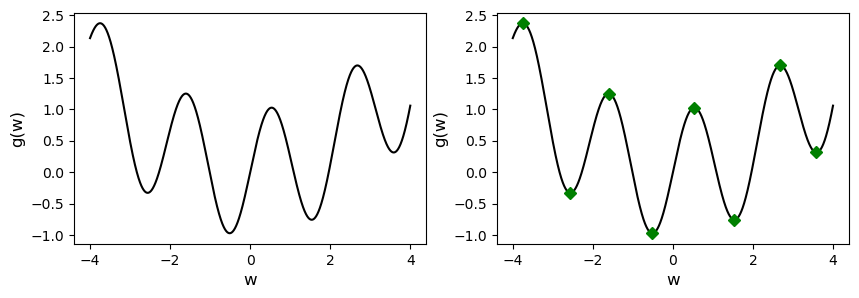

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
r_min, r_max = -4.0, 4.0
inputs = np.arange(r_min, r_max, 0.001)
results = objective(inputs)
peaks_max, _ = find_peaks(results)
peaks_min, _ = find_peaks(-results)
ax1.plot(inputs, results, 'k')
ax1.set_xlabel('w', fontsize=12)
ax1.set_ylabel('g(w)', fontsize=12)
ax2.plot(inputs, results, 'k')
ax2.set_xlabel('w', fontsize=12)
ax2.set_ylabel('g(w)', fontsize=12)
ax2.plot(inputs[peaks_max], results[peaks_max], "gD")
ax2.plot(inputs[peaks_min], results[peaks_min], "gD")
plt.show()


In [8]:
def objective(w):
	return w ** 2 + 0.2

In [9]:
def random_sampling_minimum(r_min, r_max, n_samples, objective_value, case):
    accepted_samples = []
    accepted_samples_objective = []
    minimum = 1e30
    k = 0
    while k < n_samples:
        sample = np.random.uniform(r_min, r_max)
        if objective(sample) < minimum:
            accepted_samples.append(sample) 
            minimum = objective(sample)
            accepted_samples_objective.append(minimum)
            if abs(minimum-objective_value) <= 1e-3:
                print(f"Case {case} reached convergence with {k+1} samples")
                break
            k = k + 1
    return accepted_samples, accepted_samples_objective 

Case 1 Minimum Value is 0.2833421931641292
Case 2 reached convergence with 8 samples
Case 2 Minimum Value is 0.20000888448429657


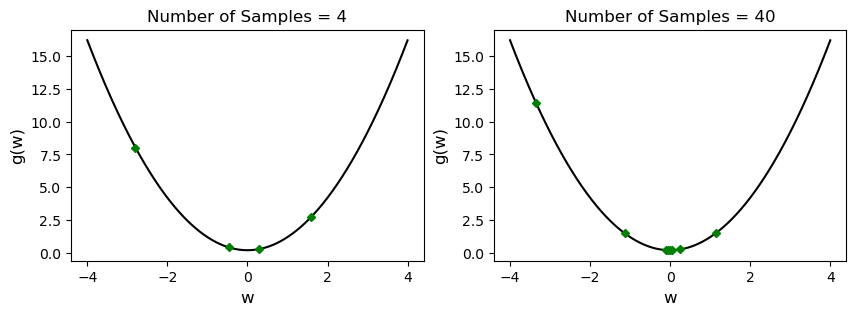

In [10]:
r_min, r_max = -4.0, 4.0
inputs = np.arange(r_min, r_max, 0.001)
number_samples = [4, 40]
plt.figure(figsize=(10,3))
objective_value  = 0.2
for n, n_samples in enumerate(number_samples):
    ax = plt.subplot(1, 2, n + 1)
    results = objective(inputs)
    ax.plot(inputs, results,'k')
    ax.set_xlabel('w', fontsize=12)
    ax.set_ylabel('g(w)', fontsize=12)
    accepted_samples, accepted_samples_objective = random_sampling_minimum(r_min, r_max, n_samples, objective_value, n + 1)
    ax.plot(np.array(accepted_samples), np.array(accepted_samples_objective), "gD", markersize=4)
    ax.set_title(f'Number of Samples = {n_samples}')
    print(f"Case {n+1} Minimum Value is {min(accepted_samples_objective)}")
plt.show()


In [11]:
def objective_vector(w):
	return np.dot(w, w.T) + 0.2

In [12]:
def multiDimensional_RandomSampling(number_samples, n_dimension, case, size_domain, objective_value, r_min = r_min, r_max=r_max):
    accepted_samples = []
    accepted_samples_objective = []
    minimum = 1e30
    k = 0
    stuck_flag = 0
    stuck_iteration = 1e6
    while k < number_samples:
        stuck_flag = stuck_flag + 1
        if stuck_flag == stuck_iteration:
            print(f"Case {case} exited since algorithm was stuck after {stuck_iteration} iterations")
            return accepted_samples, accepted_samples_objective
        sample = np.zeros(n_dimension)
        for i in range(0,n_dimension):
            sample[i] = np.random.uniform(r_min, r_max)
        if objective_vector(sample) < minimum:
            stuck_flag = 0
            accepted_samples.append(sample)
            minimum = objective_vector(sample)
            accepted_samples_objective.append(minimum)
            if abs(minimum-objective_value) <= 1e-2:
                print(f"Case {case} convergence is reached with {k+1} samples")
                return accepted_samples, accepted_samples_objective
            k = k + 1   
    return accepted_samples, accepted_samples_objective

In [13]:
number_samples = 20
n_dimension_lst = [1, 2, 3, 4, 5, 6]

r_min = -1; r_max = 1
size_domain = 100
objective_value = 0.5
run_times = np.zeros(len(n_dimension_lst))

for case, n_dimension in enumerate(n_dimension_lst):
    tic = time.time()
    accepted_samples, accepted_samples_objective = multiDimensional_RandomSampling(number_samples, n_dimension, case+1, size_domain, objective_value=objective_value, r_min=r_min, r_max=r_max)
    toc = time.time()
    print(f'Case {case+1}: Dimension is {n_dimension} with a reached minimum equal to {min(accepted_samples_objective)}')
    run_times[case] = 1000 * (toc - tic)
    print(f"Duration of Case {case+1}: {run_times[case] : .4f} ms \n")

Case 1 exited since algorithm was stuck after 1000000.0 iterations
Case 1: Dimension is 1 with a reached minimum equal to 0.2000000000002581
Duration of Case 1:  12957.9668 ms 

Case 2 convergence is reached with 2 samples
Case 2: Dimension is 2 with a reached minimum equal to 0.4949749267369891
Duration of Case 2:  0.9930 ms 

Case 3 exited since algorithm was stuck after 1000000.0 iterations
Case 3: Dimension is 3 with a reached minimum equal to 0.20018331574094556
Duration of Case 3:  16165.5281 ms 

Case 4 exited since algorithm was stuck after 1000000.0 iterations
Case 4: Dimension is 4 with a reached minimum equal to 0.2013607855160166
Duration of Case 4:  17717.1841 ms 

Case 5 exited since algorithm was stuck after 1000000.0 iterations
Case 5: Dimension is 5 with a reached minimum equal to 0.20706434526863662
Duration of Case 5:  20973.2471 ms 

Case 6 exited since algorithm was stuck after 1000000.0 iterations
Case 6: Dimension is 6 with a reached minimum equal to 0.2202641692

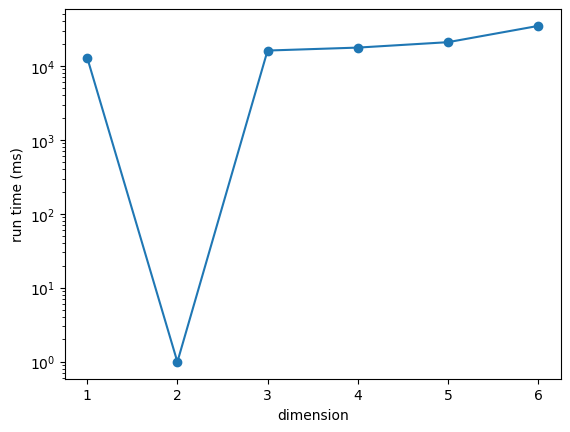

In [14]:
plt.figure()
plt.semilogy(n_dimension_lst, run_times, marker='o')
plt.xlabel('dimension')
plt.ylabel('run time (ms)')
plt.show()

## Random Search

 - The defining characteristic of the *random local search* (or just *random search*) - as is the case with every local optimization method - is how the descent direction $\mathbf{d}^{k-1}$ is chosen.
 
 
- With random search we do (perhaps) the laziest possible thing: we look locally around the current point in a fixed number of random directions for a point that has a lower objective function value, and if we find one we move to it.  

- More precisely, at the $k^{th}$ step of random search we pick a number $P$ of random directions to try out.  


- Generating the $p^{th}$ random direction $\mathbf{d}^p$ stemming from the previous step $\mathbf{w}^{k-1}$ we have a candidate point to evaluate

\begin{equation}
\mathbf{w}_{\text{candidate}} = \mathbf{w}^{k-1} + \mathbf{d}^{p}
\end{equation}

- After evaluating all $P$ candidate points we pick the one that gives us the *smallest* objective function value i.e., the one with the index given by the smallest objective function value 

\begin{equation}
s = \underset{p=1...P}{\text{argmin}}\,\,g\left(\mathbf{w}^{k-1} +  \mathbf{d}^p\right)
\end{equation}

- Finally, if best point found has a smaller objective function value than the current point i.e., if  $g\left(\mathbf{w}^{k-1} + \mathbf{d}^s\right) < g\left(\mathbf{w}^{k-1}\right)$ then we move to the new point $\mathbf{w}^k = \mathbf{w}^{k-1} + \mathbf{d}^s$, otherwise we examine another batch of $P$ random directions and try again.

- Since we have no apriori reason for doing this at each step, to keep our random candidate directions consistent we can normalize them to have the same length e.g., length one. 


- If we use directions of unit-length in our algorithm - i.e., where $\Vert \mathbf{d} \Vert_2 = 1$  always - this means that at each step of the algorithm we move a distance of length one since

\begin{equation}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \mathbf{d}\right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \mathbf{d}  \Vert_2 = 1.
\end{equation}

- From here we can adjust each step to have whatever length we desire by introducing a *steplength parameter* $\alpha$ into each step to completely control how far we travel with each step.  This more general step looks like the following:

\begin{equation}
\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha\mathbf{d}^{\,}
\end{equation}

- The length of this step - using a unit-length directions - is now exactly equal to the steplength $\alpha$, as

\begin{equation}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \alpha\mathbf{d} \right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \alpha \mathbf{d}  \Vert_2 = \alpha \Vert \mathbf{d}  \Vert_2 = \alpha
\end{equation}


- Now at the $k^{th}$ step we try out $P$ unit-length random directions - but scaled by the steplength parameter so that the distance we travel is actually $\alpha$ - taking the one that provides the greatest decrease in function value.


### Algorithms steps:
**input**: Initial point $\mathbf{w}^0$, maximum number of steps $K$, number of random samples per step $P$, a steplength $\alpha$ or diminishing steplength rule

**for** $k = 1 \cdots K$:
  * Compute $P$ unit length random directions $\{\mathbf{d}^p\}_{p=1}^P$
  * find $s = \underset{p}{\operatorname{\argmin}} \quad g(\mathbf{w}^{k-1}+\alpha\mathbf{d}^p)$
  * Set $\mathbf{d}^k=\mathbf{d}^s$
  * Form a new point $\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha\mathbf{d}^k$
  * if $g(\mathbf{w}^k) <g(\mathbf{w}^{k-1})$
    * $\mathbf{w}^{k-1} \leftarrow \mathbf{w}^k$

**output**: History of weights $\{\mathbf{w}^k\}_{k=0}^K$ and corresponding function evaluations $\{g(\mathbf{w}^k)\}_{k=0}^K$

In [ ]:
def random_search(g, alpha_choice, max_its, w, num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1, max_its + 1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1 / k
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples, np.size(w))
        # norms = np.sqrt(np.sum(directions * directions, axis = 1))[:, np.newaxis]
        norms = np.linalg.norm(directions, axis = 1)[:, np.newaxis]
        directions = directions / norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha * directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha * d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
def plot_contours(g, weight_history, view, flag3D, title):
    weights_steps_x = np.array([i[0] for i in weight_history])
    weights_steps_y = np.array([i[1] for i in weight_history])
    x = y = np.arange(-4.5, 4.5, 0.05)
    X, Y = np.meshgrid(x, y)
    zs = np.array([g(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    if (flag3D):
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111,projection='3d')
        ax.quiver(weights_steps_x[:-1], weights_steps_y[:-1], np.zeros(weights_steps_x[:-1].shape[0]), weights_steps_x[1:]-weights_steps_x[:-1], weights_steps_y[1:]-weights_steps_y[:-1], np.zeros(weights_steps_x[:-1].shape[0]),\
            color='k')
        ax.grid(False)
        ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.coolwarm, linewidth=10, antialiased=False)
        ax.view_init(view[0], view[1])
        ax.set_xlabel(r'$w_1$')
        ax.set_ylabel(r'$w_2$')
        ax.set_zlabel(r'$g(w)$')
        ax.set_title(title,fontsize=16)
    #ax.plot([0, 0], [-4.5,4.5], [0,0])
    fig = plt.figure(figsize=(5,5))
    cp = plt.contourf(X, Y, Z, cmap='coolwarm')
    plt.colorbar(cp)
    plt.xlabel(r'$w_1$', fontsize=12)
    plt.ylabel(r'$w_2$', fontsize=12)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.plot(weights_steps_x, weights_steps_y, 'sk', markersize=4)
    plt.quiver(weights_steps_x[:-1], weights_steps_y[:-1], weights_steps_x[1:]-weights_steps_x[:-1], weights_steps_y[1:]-weights_steps_y[:-1], scale_units='xy', angles='xy', scale=1)
    plt.plot(weights_steps_x[-1], weights_steps_y[-1], 'sy')
    plt.title(title,fontsize=16)
    plt.show()

### Random search applied to minimize a simple quadratic
The function being minimized is the simple quadratic $g(\mathbf{w}) = \mathbf{w}^T \mathbf{w}^{\,} + 2$.  

In [ ]:
g = lambda w: np.dot(w.T, w) + 2
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5; #for k in range(1,max_its+1): 
weight_history, cost_history = random_search(g, alpha_choice, max_its ,w, num_samples)

In [ ]:
plot_contours(g, weight_history, view=[20,100], flag3D=True, title = 'Random Search')

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(range(0,max_its+1), cost_history, 'dk-')
plt.title(r'$g(w^k)$ vs. step $k$', fontsize=16)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.show()


### Minimizing a function with many local minima using random search

- In this example we show what one may need to do in order to find the global minimum of a function using (normalized) random local search. 


- For visualization purposes we use the single-input function $g(w) = \text{sin}(3w) + 0.1w^2$.


- We initialize two runs at $w_0^{(1)} = 4.5$ and $w_0^{(2)} = -1.5$.  For both runs we use a steplength of $\alpha = 0.1$ fixed for all 10 iterations.  

In [ ]:
g = lambda w: np.sin(3 * w) + 0.1 * w ** 2

### do two random searchs with different starting points
w1_initial = 4.5
w2_initial = -1.5

alpha_choice = 0.1; w = np.asarray([w1_initial]); num_samples = 10; max_its = 10;
weight_history_1, cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)
weights_steps_x_1 = np.asarray([i[0] for i in weight_history_1])

alpha_choice = 0.1; w = np.asarray([w2_initial]); num_samples = 10; max_its = 10;
weight_history_2,cost_history_2 = random_search(g,alpha_choice,max_its,w,num_samples)
weights_steps_x_2 = np.asarray([i[0] for i in weight_history_2])

r_min = -5; r_max = 5
plt.figure(figsize=(10,5))
x = np.arange(r_min,r_max,0.01)
plt.plot(x, g(x), 'k-')
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.xlim(-5,5)
plt.figure(figsize=(10,5))
plt.plot(x, g(x), 'k-')
plt.plot(weight_history_1, cost_history_1, 'gx')
plt.quiver(weights_steps_x_1[:-1], np.zeros(weights_steps_x_1[:-1].shape[0]), weights_steps_x_1[1:]-weights_steps_x_1[:-1], \
    np.zeros(weights_steps_x_1[1:].shape[0]), scale_units='xy', angles='xy', scale=1, color='g')
plt.plot(weight_history_2, cost_history_2, 'rd')
plt.quiver(weights_steps_x_2[:-1], np.zeros(weights_steps_x_2[:-1].shape[0]), weights_steps_x_2[1:]-weights_steps_x_2[:-1], \
    np.zeros(weights_steps_x_2[1:].shape[0]), scale_units='xy', angles='xy', scale=1, color='r')
plt.plot(weights_steps_x_1[-1], g(weights_steps_x_1[-1]), 'xy', markersize=7)
plt.plot(weights_steps_x_2[-1], g(weights_steps_x_2[-1]), 'dy', markersize=7)
plt.plot(weights_steps_x_1[-1], 0, 'xy', markersize=7)
plt.plot(weights_steps_x_2[-1], 0, 'dy', markersize=7)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.xlim(-5,5)
plt.show()


### Unit length steps fail to converge to global minimum

- Here we re-run the random local search algorithm using the same simple quadratic and algorithm settings:

- $g(w) = \mathbf{w^T}\mathbf{w} + 2$.

- Now we initialize at the point $\mathbf{w}^0 = \begin{bmatrix} 1.5 \\ 2 \end{bmatrix}$ which prevents the algorithm from reaching the function's global minimum.  

In [ ]:
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 1; w = np.asarray([1.5, 2]); num_samples = 1000; max_its = 30;
weight_history_1,cost_history_1 = random_search(g, alpha_choice, max_its, w, num_samples)

In [ ]:
plot_contours(g, weight_history_1, view=[20,100],flag3D=True, title = 'Random Search')

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(range(0,max_its+1), cost_history_1, 'dk-')
plt.title(r'$g(w^k)$ vs. step $k$', fontsize=16)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.show()

- Setting the steplength parameter $\alpha$ smaller we can look again make another run mirroring the one performed above, with much better results.  

- $g(w) = \mathbf{w^T}\mathbf{w} + 2$.

- Below we make the same run as above except now we set $\alpha = 0.1$ for all steps.  Running the algorithm now we can see that it converges to a point much closer to the global minimum of the function at $\mathbf{w} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

In [ ]:
g = lambda w: np.dot(w.T,w) + 2

alpha_choice = 0.1; w = np.asarray([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_2,cost_history_2 = random_search(g, alpha_choice, max_its ,w, num_samples)

plot_contours(g, weight_history_2, view=[20,100], flag3D=True, title = 'Random Search')

- Remember however that we need to be careful in choosing the steplength value with this simple quadratic, and by extension any general function.  

- $g(w) = \mathbf{w^T}\mathbf{w} + 2$.

- If - for example - we run the same experiment again but cut the steplength down to $\alpha = 0.01$ we do not reach a point anywher near the global minimum, as we show by performing the same run but setting $\alpha$ to this value.  

In [ ]:
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 0.01; w = np.asarray([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_3,cost_history_3 = random_search(g, alpha_choice, max_its, w, num_samples)

plot_contours(g, weight_history_3, view=[20,100], flag3D=True, title = 'Random Search')

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(range(0,max_its+1), cost_history_2, 'dk-', label = r'$\alpha=0.1$')
plt.plot(range(0,max_its+1), cost_history_3, 'sr-',  label = r'$\alpha=0.01$')
plt.title(r'$g(w^k)$ vs. step $k$', fontsize=16)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.legend()
plt.show()

## Coordinate Search and Descent

- The *coordinate search* algorithm takes the theme of descent direction search and - instead of searching randomly - restricts the set of directions to the coordinate axes of the input space alone.  


- While this significantly limits the kinds of descent directions we can recover it far more scalable than seeking out a good descent direction at random, and opens the search-approach to determining descent directions to usage with higher dimensional input functions.

- This means - in particular - each pair of candidate points using a single standard basis direction looks like

\begin{equation}
\mathbf{w}_{\text{candidate}} = \mathbf{w}^{k-1} \pm \alpha \mathbf{e}_n.
\end{equation}

- It is this restricted set of directions we are searching over that distinguishes the coordinate search approach from the random search approach described previously, where the set of directions at each step was made up of random directions. 


- While the diversity of the coordinate axes may limit the effectiveness of the possible descent directions it can encounter and thus require more steps to determine an approximate minimum, the restricted search makes coordinate search far more scalable than the random search method since at each step only $2N$ directions must be tested.

### Coordinate Search Algorithm
- **Input**: Initial point $\mathbf{w}^0$, maximum number of steps $K$, a steplength $\alpha$ or diminishing steplength rule, take the set of directions $\mathbf{d}^{2n-1}$ and $\mathbf{d}^{2n} = -\mathbf{e}_n$ for $n=1 \cdots N$ and set $P=2N$

$\quad$ **for** $k = 1 \cdots K$:
  * find $s = \underset{p}{\operatorname{\argmin}} g(\mathbf{w}^{k-1}+\alpha\mathbf{d}^p)$
  * Set $\mathbf{d}^k=\mathbf{d}^s$
  * Form a new point $\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha\mathbf{d}^k$
  * if $g(\mathbf{w}^k)<g(\mathbf{w}^{k-1})$
    * $\mathbf{w}^{k-1} \leftarrow \mathbf{w}^k$

**output**: History of weights $\{\mathbf{w}^k\}_{k=0}^K$ and corresponding function evaluations $\{g(\mathbf{w}^k)\}_{k=0}^K$

### Coordinate Descent Algorithm

A slight twist on the coordinate search produces a much more effective algorithm at precisely the same computational cost. Instead of collecting each coordinate direction (along with its negative), and then choosing a single best direction from this entire set, we can simply examine one coordinate direction (and its negative) at a time and step in this direction if it produces descent. Whereas with coordinate search we evaluate the cost function $2N$ times (once per coordinate direction and its negative) to produce a single step, this alternative takes the same number of function evaluations but potentially moves $N$ steps in doing so. In other words this means that for precisely the same cost as coordinate search we can (potentially) descent much faster with coordinate descent.

This twist on the coordinate search approach is called a coordinate descent, since each step evaluates a single coordinate direction and decides whether or not to move in this direction alone. This particular algorithm - while itself being the most effective zero order method we have seen thus far by far

**Input**: Initial point $\mathbf{w}^0$, maximum number of steps $K$, a steplength $\alpha$ or diminishing steplength rule

**for** $k = 1 \cdots K$:

$\quad$ **for** $n = 1 \cdots N$:
  * find $s = \underset{}{\operatorname{\argmin}} \{g(\mathbf{w}^{k+n-1}+\alpha\mathbf{e}_n), g(\mathbf{w}^{k+n-1}-\alpha\mathbf{e}_n)\}$
  * Set $\mathbf{d}^{k+n}=(-1)^s\mathbf{e}_n$
  * Form a new point $\mathbf{w}^{k+n} = \mathbf{w}^{k+n-1} + \alpha\mathbf{d}^{k+n}$
  * if $g(\mathbf{w}^{k+n})<g(\mathbf{w}^{k+n-1})$
    * $\mathbf{w}^{k+n-1} \leftarrow \mathbf{w}^{k+n}$

**output**: History of weights $\{\mathbf{w}^k\}_{k=0}^{KN}$ and corresponding function evaluations $\{g(\mathbf{w}^k)\}_{k=0}^{KN}$

In [ ]:
# zero order coordinate search
def coordinate_search(g,alpha_choice,max_its,w):
    # construct set of all coordinate directions
    #directions_plus = np.eye(np.size(w),np.size(w))
    directions_plus = np.eye(np.size(w))
    #directions_minus = - np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
def coordinate_descent_zero_order(g,alpha_choice,max_its,w):  
    # run coordinate search
    N = np.size(w)
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # random shuffle of coordinates
        c = np.random.permutation(N)
        
        # forming the direction matrix out of the loop
        cost = g(w)
        
        # loop over each coordinate direction
        for n in range(N):
            direction = np.zeros((N,1)).flatten()
            direction[c[n]] = 1
    
            # record weights and cost evaluation
            weight_history.append(w)
            cost_history.append(cost)

            # evaluate all candidates
            evals =  [g(w + alpha*direction)]
            evals.append(g(w - alpha*direction))
            evals = np.array(evals)

            # if we find a real descent direction take the step in its direction
            ind = np.argmin(evals)
            if evals[ind] < cost_history[-1]:
                # take step
                w = w + ((-1)**(ind))*alpha*direction
                cost = evals[ind]
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

### Coordinate Search vs. Random Search

Note however that while it may take the coordinate search method more steps to reach the minimum of this particular function, it is still far more computationally efficient than the random search run shown above. This is because when it comes down to the cost per step of each algorithm

- with coordinate search: checking the positive and negative directions along the coordinate axes in  N
 dimensional space costs essentially  2N
  function evaluations (one per direction)
- with random search: checking  P
  random directions essentially costs  P
  function evaluations per step (again, one per direction)

$g(w) = \mathbf{w^T}\mathbf{w} + 2$.

In [ ]:
# define function
g = lambda w: np.dot(w.T,w) + 2

tic = time.time()  # capture start time
# run random search algorithm 
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)
toc = time.time()  # capture end time
print(f"Duration of Random Search: {1000*(toc-tic):.4f} ms ")
print(f"Final Cost of Random Search: {cost_history_1[-1]}")

tic = time.time()  # capture start time
# run coordinate search algorithm 
alpha_choice = 1; w = np.array([3,4]); max_its = 7;
weight_history_2,cost_history_2 = coordinate_search(g,alpha_choice,max_its,w)
toc = time.time()  # capture end time
print(f"Duration of Coordinate Search: {1000*(toc-tic):.4f} ms ")
print(f"Final Cost of Coordinate Search: {cost_history_2[-1]}")

Coordinate search is a local optimization method, and so we still must properly set the steplength parameter¶

$g(w_1,w_2) = 0.26(w_1^2+w_2^2) -0.48w_1w_2$.

In [ ]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)
plot_contours(g, weight_history_1, view=[20,50], flag3D = False, title = 'Random Search')
alpha_choice = 1; w = np.array([3,4]); max_its = 5;
weight_history_2,cost_history_2 = coordinate_search(g,alpha_choice,max_its,w)
plot_contours(g, weight_history_2, view=[20,50], flag3D = False, title = 'Coordinate Search')

### Coordinate Search vs. Coordinate Descent

$g(w_1,w_2) = 0.26(w_1^2+w_2^2) -0.48w_1w_2$.

In [ ]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run coordinate search algorithm 
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 40;
weight_history_1,cost_history_1 = coordinate_search(g,alpha_choice,max_its,w)
plot_contours(g, weight_history_1, view=[20,50], flag3D = False, title = 'Coordinate Search')
# run coordinate descent algorithm
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 40;
weight_history_2,cost_history_2 = coordinate_descent_zero_order(g,alpha_choice,max_its,w)
#plot_contours(g, weight_history_2, view=[20,50], flag3D = False, title = 'Coordinate Descent')

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(range(0,max_its+1), cost_history_1, label = 'Coordinate Search')
plt.plot(range(0, len(cost_history_2)), cost_history_2,  label = 'Coordinate Descent')
plt.title(r'$g(w^k)$ vs. step $k$', fontsize=16)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.legend()
plt.show()

$g(w_1,w_2) = 0.26(w_1^2+w_2^2) -0.48w_1w_2$.

In [ ]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run coordinate search algorithm 
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 100;
weight_history,cost_history = coordinate_descent_zero_order(g,alpha_choice,max_its,w)

plot_contours(g, weight_history, view=[20,50], flag3D = False, title = 'Coordinate Descent')


# First Order Optimization Techniques

## Coordinate Descent and The First order Optimality Condition

In [ ]:
def coordinate_descent_for_quadratic(g,w,max_its,a,b,C):
    '''
    Coordinate descent wrapper for general quadratic function. Here
    
    a - a constant
    b - an Nx1 vector
    C - an NxN matrix (symmetric and all nonnegative eigenvalues)
    '''
        
    # record weights and cost history 
    weight_history = [copy.deepcopy(w)]     
    cost_history = [g(w)]
    N = np.size(w)
    
    # outer loop - each is a sweep through every variable once
    for k in range(max_its):
        # inner loop - each is a single variable update
        for n in range(N):
            w[n] = -(np.dot(C[n,:],w) - C[n,n]*w[n] + 0.5*b[n])/float(C[n,n])
            
            # record weights and cost value at each step
            weight_history.append(copy.deepcopy(w))
            cost_history.append(g(w))

    return weight_history,cost_history

- First we use this algorithm to minimize the simple quadratic 

\begin{equation}
g(w_0,w_1) = w_0^2 + w_1^2 + 2
\end{equation}


- We initialize at $\mathbf{w} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ and run $1$ iteration of the algorithm - that is all it takes to perfectly minimize the function, as shown below.

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# define constants for a N=2 input quadratic
a = 2
b = np.zeros((2,1))
C = np.eye(2)

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 1
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

In [ ]:
plot_contours(g, weight_history, view=[20,50], flag3D = False, title = 'Coordinate Descent on a convex quadratic function')

- Below we show a run of $2$ iterations of the method at the same initial point for the quadratic

\begin{equation}
g(w_0,w_1) = 2w_0^2 + 2w_1^2 + 2w_0w_1 + 20
\end{equation}

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# define constants for a N=2 input quadratic
a = 20
b = np.zeros((2,1))
C = np.array([[2,1],[1,2]])

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 2
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

plot_contours(g, weight_history, view=[20,50], flag3D = False, title = 'Coordinate Descent on a convex quadratic function')

## Gradient Descent

### The gradient descent algorithm

1. function $g$, steplength $\alpha$, maximum number of steps $K$, and initial point $\mathbf{w}^0$ <br/>

2.  <code>for</code> $\,\,k = 1...K$<br/>

    * $\mathbf{w}^k = \mathbf{w}^{k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)$ <br/>

4.  <strong>output:</strong> history of weights $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$ and corresponding function evaluations $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$ <br/>

<hr style="height:1px;border:none;color:#555;background-color:#555;"/>
</p>

In [ ]:
## This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

- Now we show the result of running gradient descent several times to minimize the function

\begin{equation}
g(w) = \text{sin}(3w) + 0.1w^2
\end{equation}


- For general non-convex functions like this one, several runs (of any local optimization method) can be necessary to determine points near global minima.

In [ ]:
def g(w):
    return np.sin(3*w) + 0.1*w**2

# run gradient descent
alpha = 0.05; w = 4.5; max_its = 10;
weight_history_1,cost_history_1 = gradient_descent(g,alpha,max_its,w)
weights_steps_x_1 = np.array(weight_history_1)

alpha = 0.05; w = -1.5; max_its = 10;
weight_history_2,cost_history_2 = gradient_descent(g,alpha,max_its,w)
weights_steps_x_2 = np.array(weight_history_2)

In [ ]:
r_min = -5; r_max = 5
plt.figure(figsize=(10,5))
x = np.arange(r_min,r_max,0.01)
plt.plot(x, g(x), 'k-')
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.xlim(-5,5)
plt.figure(figsize=(10,5))
plt.plot(x, g(x), 'k-')
plt.plot(weight_history_1, cost_history_1, 'gx')
plt.quiver(weights_steps_x_1[:-1], np.zeros(weights_steps_x_1[:-1].shape[0]), weights_steps_x_1[1:]-weights_steps_x_1[:-1], \
    np.zeros(weights_steps_x_1[1:].shape[0]), scale_units='xy', angles='xy', scale=1, color='g')
plt.plot(weight_history_2, cost_history_2, 'rd')
plt.quiver(weights_steps_x_2[:-1], np.zeros(weights_steps_x_2[:-1].shape[0]), weights_steps_x_2[1:]-weights_steps_x_2[:-1], \
    np.zeros(weights_steps_x_2[1:].shape[0]), scale_units='xy', angles='xy', scale=1, color='r')
plt.plot(weights_steps_x_1[-1], g(weights_steps_x_1[-1]), 'xy', markersize=7)
plt.plot(weights_steps_x_2[-1], g(weights_steps_x_2[-1]), 'dy', markersize=7)
plt.plot(weights_steps_x_1[-1], 0, 'xy', markersize=7)
plt.plot(weights_steps_x_2[-1], 0, 'dy', markersize=7)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.xlim(-5,5)
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(range(0,max_its+1), cost_history_1, 'dg-', label = r'Run $1$')
plt.plot(range(0,max_its+1), cost_history_2, 'sr-',  label = r'Run $2$')
plt.title(r'$g(w^k)$ vs. step $k$', fontsize=16)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.legend()
plt.show()

## Newton's Method

In [ ]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        beta = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))
        
        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]
alpha = 1; w = np.array([4.0, 2.0]); max_its = 100;
weight_history_1,cost_history_1 = gradient_descent(g,alpha,max_its,w)
weights_steps_x_1 = np.array([i[0] for i in weight_history_1])

#plot_contours(g, weight_history_1, view=[20,50], flag3D = False, title = 'Gradient Descent')

w = np.array([4.0, 2.0]); max_its = 1;
weight_history_2,cost_history_2 = newtons_method(g,max_its,w)
weights_steps_x_2 = np.array([i[0] for i in weight_history_2])

plot_contours(g, weight_history_2, view=[20,50], flag3D = False, title = 'Newton Method')